<a href="https://colab.research.google.com/github/G0rav/Image_Segmentation/blob/main/Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2

import tensorflow as tf
import tensorflow_datasets as tfds

from IPython.display import clear_output
import matplotlib.pyplot as plt
% matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'

In [2]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incomplete88X8P9/oxford_iiit_pet-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incomplete88X8P9/oxford_iiit_pet-test.tfrecord


Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [3]:
dataset['train']

<PrefetchDataset shapes: {file_name: (), image: (None, None, 3), label: (), segmentation_mask: (None, None, 1), species: ()}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64, segmentation_mask: tf.uint8, species: tf.int64}>

In [4]:
info

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    version=3.2.0,
    description='The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed.',
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
        'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=7349,
    splits={
        'test': 3669,
        'train': 3680,
    },
    supervised_keys=('image', 'label'),
    citation="""@InProceedings{parkhi12a,
      author       = "Parkhi, O. M. and Vedaldi, A. and Zisserman, A. and Ja

In [21]:
images = list(dataset['train'].map(lambda x: x['image']))
display(len(images))
display(images[0].shape, images[1].shape)

3680

TensorShape([500, 500, 3])

TensorShape([313, 500, 3])

In [22]:
segmentation_masks = list(dataset['train'].map(lambda x: x['segmentation_mask']))
display(len(segmentation_masks))
display(segmentation_masks[0].shape, segmentation_masks[1].shape)

3680

TensorShape([500, 500, 1])

TensorShape([313, 500, 1])

In [23]:
labels = list(dataset['train'].map(lambda x: x['label']))
display(len(labels))
display(labels[0], labels[1])

3680

<tf.Tensor: shape=(), dtype=int64, numpy=33>

<tf.Tensor: shape=(), dtype=int64, numpy=12>

In [24]:
species = list(dataset['train'].map(lambda x: x['species']))
display(len(species))
display(species[0], species[1])

3680

<tf.Tensor: shape=(), dtype=int64, numpy=0>

<tf.Tensor: shape=(), dtype=int64, numpy=1>

species: tf.Tensor(0, shape=(), dtype=int64)
label: tf.Tensor(33, shape=(), dtype=int64)


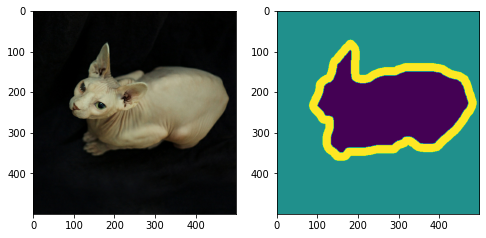

species: tf.Tensor(1, shape=(), dtype=int64)
label: tf.Tensor(34, shape=(), dtype=int64)


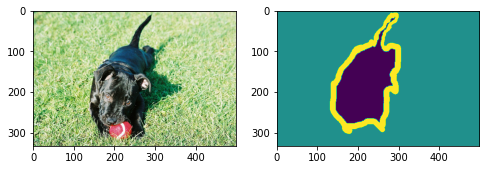

species: tf.Tensor(0, shape=(), dtype=int64)
label: tf.Tensor(5, shape=(), dtype=int64)


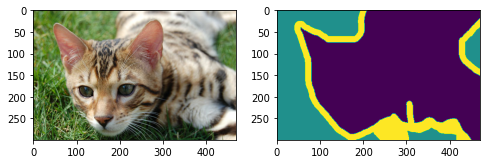

species: tf.Tensor(1, shape=(), dtype=int64)
label: tf.Tensor(31, shape=(), dtype=int64)


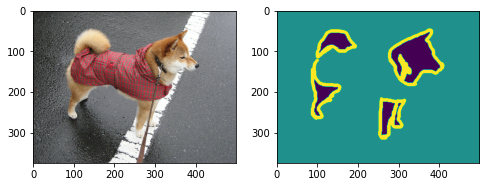

species: tf.Tensor(1, shape=(), dtype=int64)
label: tf.Tensor(30, shape=(), dtype=int64)


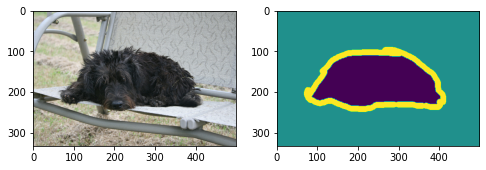

species: tf.Tensor(1, shape=(), dtype=int64)
label: tf.Tensor(10, shape=(), dtype=int64)


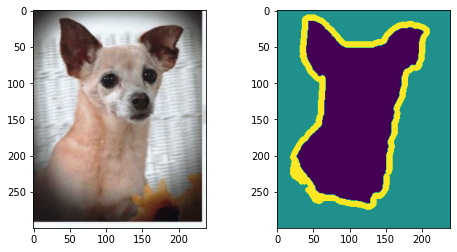

In [36]:
for i in [0,100,500,1000,2000,3000]:
  print(f'species:',species[i])
  print(f'label:',labels[i])

  plt.figure(figsize = (8,4))
  plt.subplot(121)
  image = np.array(images[i])
  plt.imshow(image)

  plt.subplot(122)
  mask = np.array(segmentation_masks[i])
  mask = mask.reshape(mask.shape[0], mask.shape[1])
  plt.imshow(mask)
  plt.show()


In [ ]:
x = x.reshape(x.shape[0], x.shape[1])

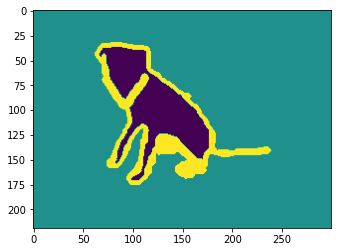

In [ ]:
plt.imshow(x)

# voc Dataset

In [ ]:
info

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    version=3.2.0,
    description='The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed.',
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
        'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=7349,
    splits={
        'test': 3669,
        'train': 3680,
    },
    supervised_keys=('image', 'label'),
    citation="""@InProceedings{parkhi12a,
      author       = "Parkhi, O. M. and Vedaldi, A. and Zisserman, A. and Ja

In [ ]:
images = list(dataset['train'].map(lambda x: x['image']))
len(images)

3680

In [ ]:
x = np.array(images[5])
x.shape

(219, 300, 3)

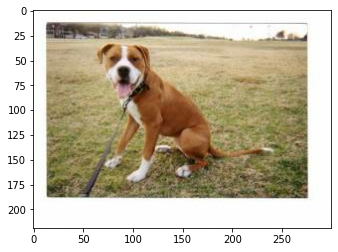

In [ ]:
plt.imshow(x)

In [ ]:
images = list(dataset['train'].map(lambda x: x['image']))
len(images)